In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
# Step 1: Import Libraries
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Show plots inline
%matplotlib inline

In [18]:
# Step 2: Load Dataset
# =========================
# Path in Kaggle (adjust the folder name if your dataset name is different)
df = pd.read_csv("/kaggle/input/titanic/train.csv")


In [19]:
# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Step 3: Basic Info
# =========================
print("Shape of dataset:", df.shape)
print("\nData types and null values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

Shape of dataset: (891, 12)

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000   

In [21]:
# Count missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


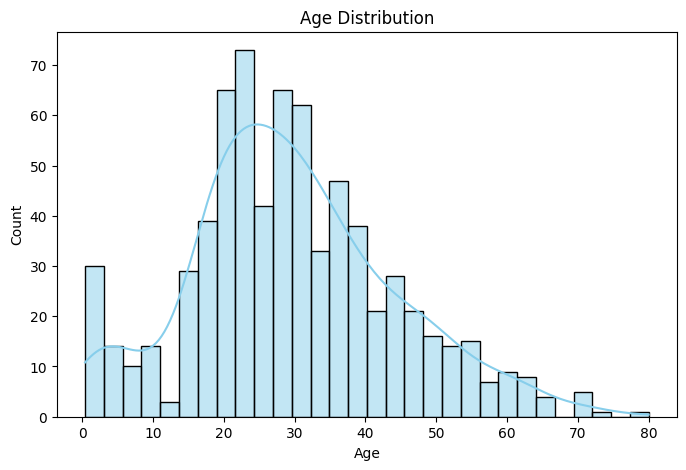

In [22]:
# Step 4: Univariate Analysis
# =========================

# Histogram - Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

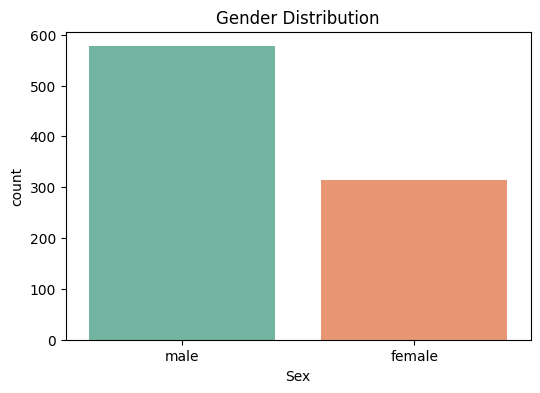

In [23]:
# Countplot - Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()

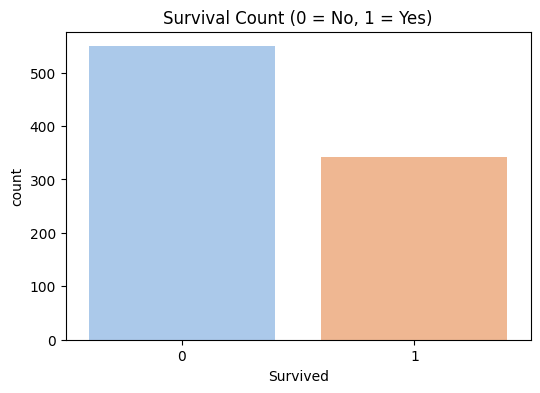

In [24]:
# Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette="pastel")
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

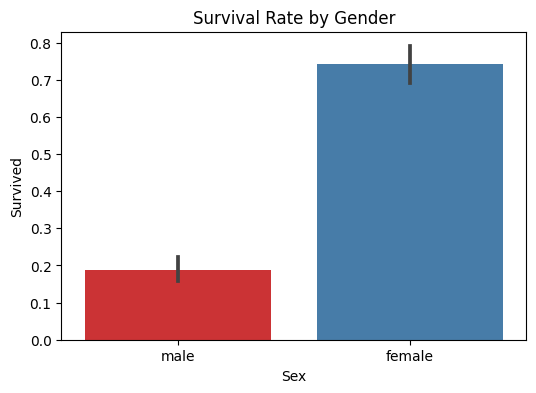

In [25]:
# Step 5: Bivariate Analysis
# =========================

# Survival rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df, palette="Set1")
plt.title("Survival Rate by Gender")
plt.show()

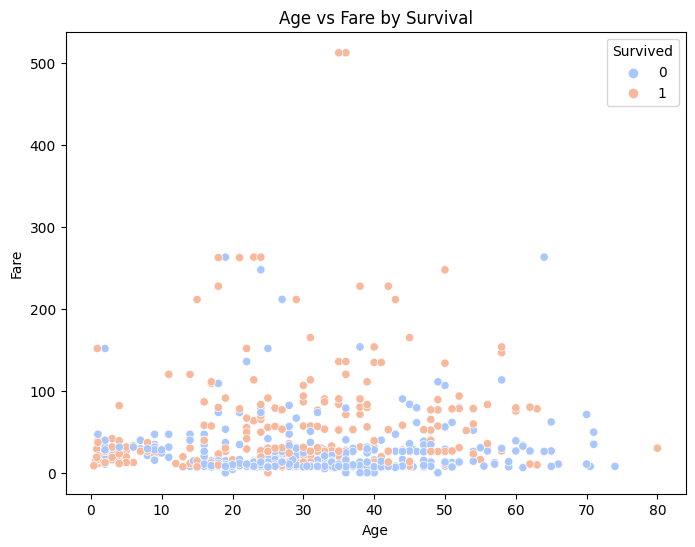

In [26]:
# Age vs Fare colored by survival
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette="coolwarm")
plt.title("Age vs Fare by Survival")
plt.show()

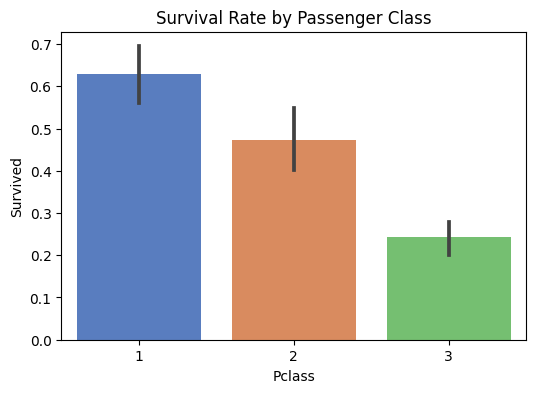

In [27]:
# Survival rate by passenger class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, palette="muted")
plt.title("Survival Rate by Passenger Class")
plt.show()


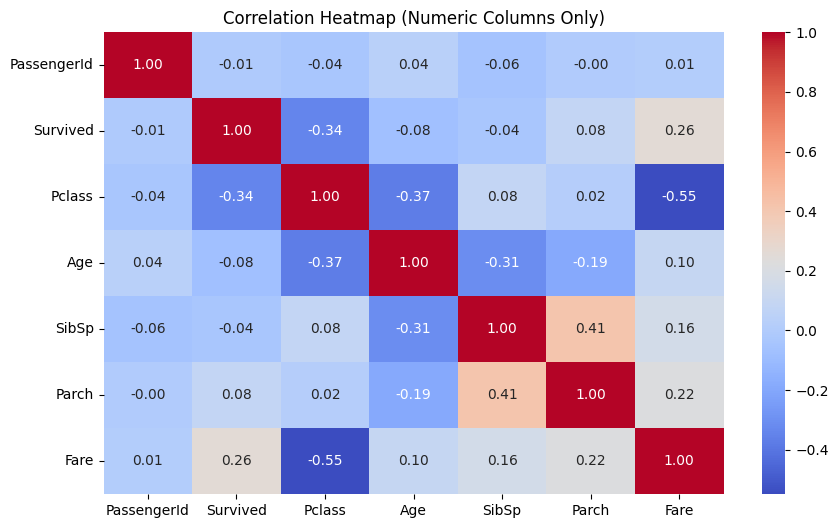

In [30]:
# Step 6: Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

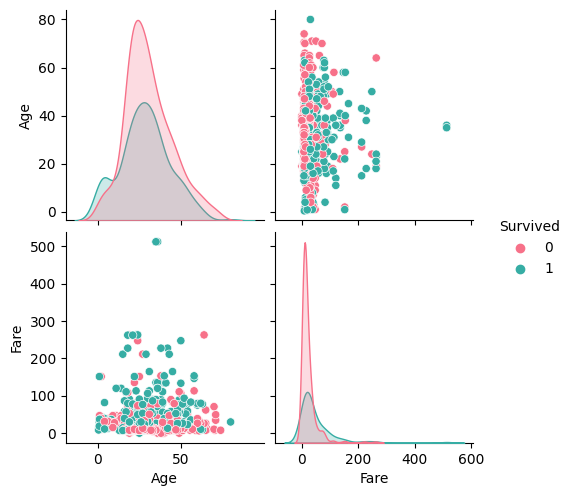

In [31]:
# Step 7: Pairplot
# =========================
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived', palette="husl")
plt.show()

In [33]:
# Step 8: Observations Template
# =========================

observations = """
1. Most passengers were between 20–40 years old.
2. Females had a higher survival rate than males.
3. Passengers in 1st class had higher survival chances.
4. Higher fare is associated with higher survival rates.
5. Age does not show a strong direct relationship with survival.
"""
print(observations)


1. Most passengers were between 20–40 years old.
2. Females had a higher survival rate than males.
3. Passengers in 1st class had higher survival chances.
4. Higher fare is associated with higher survival rates.
5. Age does not show a strong direct relationship with survival.

